# Proyecto Final
### Analisis de Datos
### Modelo: Rregresión Logística

### Estudiante: Adrian Esteban Armero Burbano

El modelo seleccionado es el de Regresión logística ya que es ideal para el dataset Titanic porque permite predecir variables categóricas binarias, como si un pasajero sobrevivió o no. Este modelo estadístico es adecuado ya que las características del dataset, como la clase del boleto, el género, la edad y el número de familiares a bordo, son factores que pueden influir en la probabilidad de supervivencia. Además, la regresión logística calcula la probabilidad de cada posible resultado (sobrevivir o no), lo que facilita interpretar cómo cada variable afecta al desenlace, permitiendo un análisis claro y efectivo para este tipo de problemas de clasificación.


Seleccionar uno de los modelos de Aprendizaje Supervisado vistos
en la Tarea 3 (Regresión Lineal, Regresión Logística o Árboles de
decisión) y realizar los siguientes pasos:
1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo.
5. Entrenar el modelo configurando los diferentes
hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos


In [6]:
import pandas as pd # Importa la biblioteca pandas para la manipulación y análisis de datos
import matplotlib.pyplot as plt # Biblioteca crear gráficos y visualizar datos.
import seaborn as sns # para crear gráficos estadísticos
from sklearn.preprocessing import RobustScaler #para escalar características y reducir el impacto de valores atípicos.
# SelectKBest permite seleccionar las mejores características basadas en su puntuación.
# f_classif utiliza la prueba ANOVA F para determinar la relevancia de las características.
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression #para implementar un modelo de clasificación basado en regresión logística.
# train_test_split divide los datos en conjuntos de entrenamiento y prueba.
# GridSearchCV realiza una búsqueda exhaustiva para encontrar los mejores hiperparámetros de un modelo.
from sklearn.model_selection import train_test_split, GridSearchCV
# accuracy_score: Calcula la precisión del modelo.
# confusion_matrix: Genera la matriz de confusión.
# roc_auc_score: Calcula el área bajo la curva ROC, útil para evaluar modelos de clasificación.
# classification_report: Proporciona un resumen de las métricas como precisión, recall y F1-score.
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE # para abordar problemas de datos desbalanceados generando ejemplos sintéticos en la clase minoritaria.

## 1. Análisis Exploratorio de Datos

In [56]:
#Cargar el dataset en un DataFrame
data=pd.read_csv('Titanic-Dataset.csv')

In [10]:
#Obtener primeros 15 registros del dataset
print(data.head(15))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                

## Columnas y Tipos de Datos

In [12]:
#Verificar nombre y tipo de dato en las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
#Eliminar variables innecesarias
data=data.drop(['Name', 'Ticket', 'Cabin'], axis=1)


### Eliminar Variables
Name: Aunque contiene información textual única, no contribuye directamente al modelo de predicción, ya que el nombre del pasajero no tiene una relación cuantificable con su supervivencia.

Ticket: Es un dato nominal que varía mucho y no tiene un patrón útil para determinar la probabilidad de supervivencia. Además, su procesamiento para extraer información útil requeriría un esfuerzo adicional que probablemente no aporte beneficios significativos al modelo.

Cabin: Esta columna tiene muchos valores nulos, lo que dificulta su uso en el modelo. Aunque podría dar una pista de la ubicación dentro del barco, la gran cantidad de datos faltantes hace que su impacto en el modelo sea limitado.

## Valores Atípicos

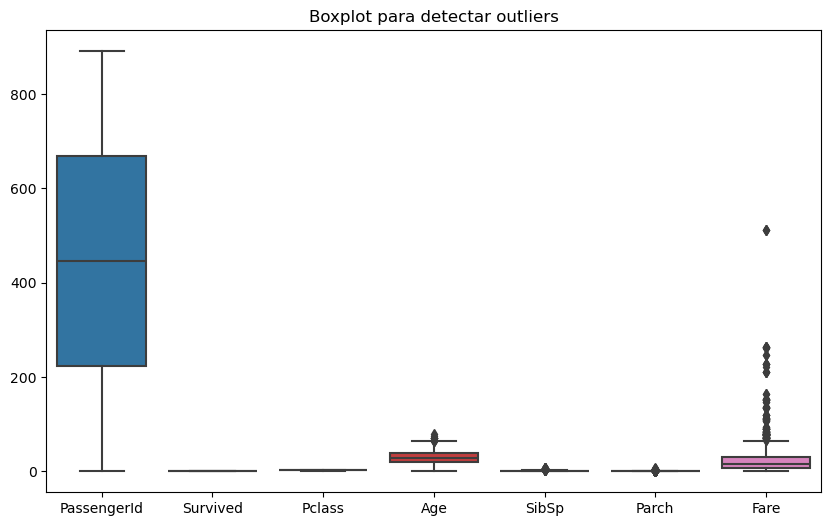

In [18]:
#Visualizar valores atipicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot para detectar outliers')
plt.show()

### Análisis Gráfico

Se puede observar en el gráfico que las columnas Age, SibSp, Parch, y Fare, contienen valores atipicos

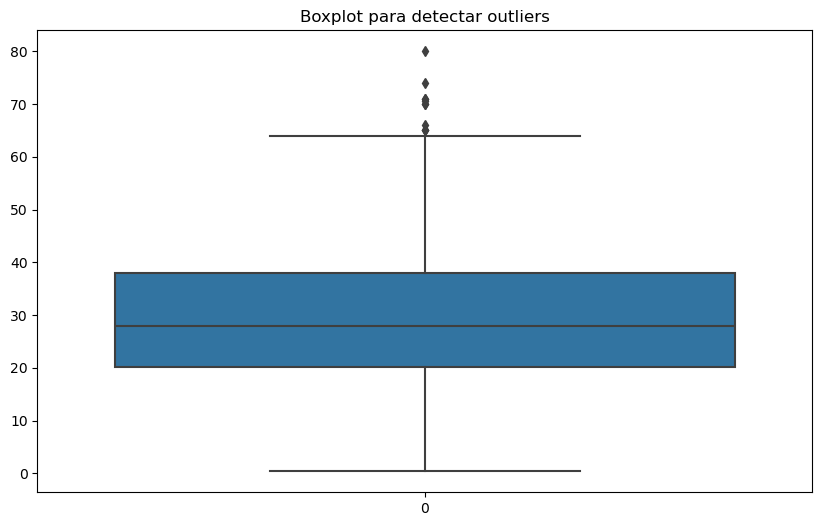

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Age'])
plt.title('Boxplot para detectar outliers')
plt.show()

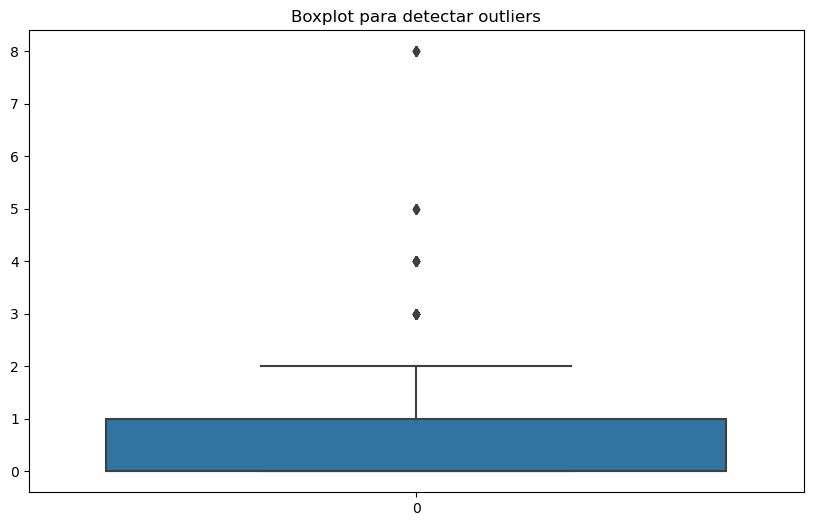

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['SibSp'])
plt.title('Boxplot para detectar outliers')
plt.show()

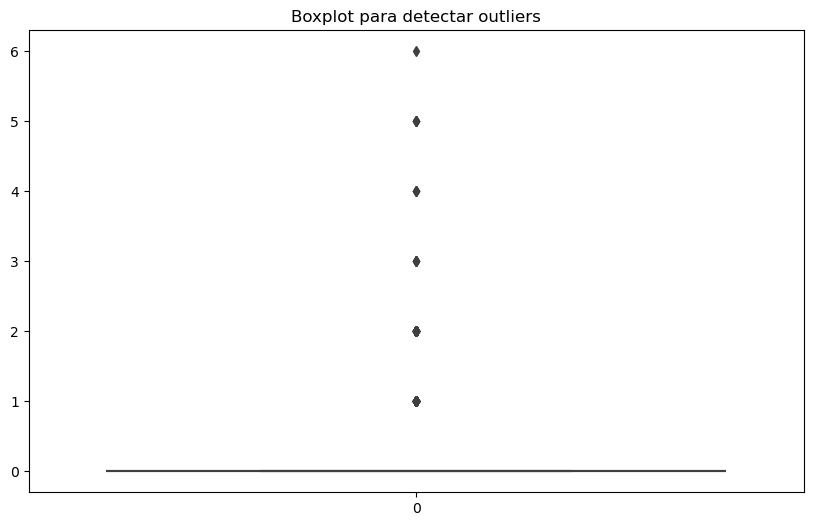

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Parch'])
plt.title('Boxplot para detectar outliers')
plt.show()

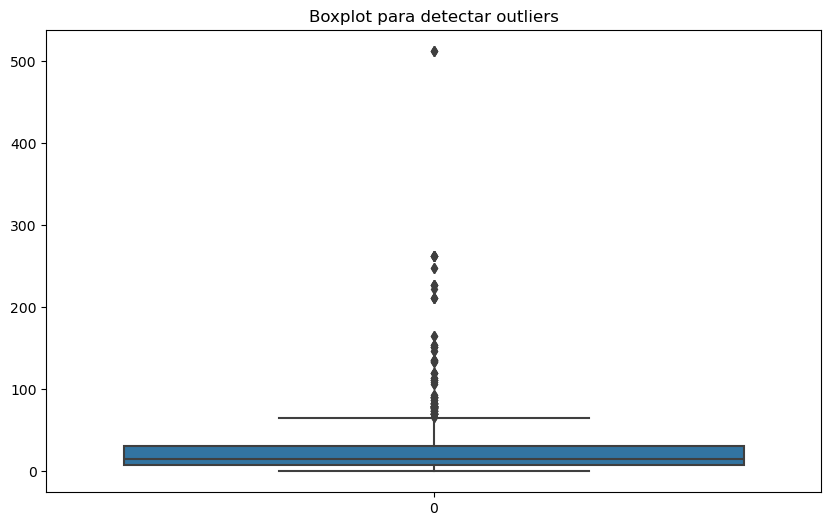

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Fare'])
plt.title('Boxplot para detectar outliers')
plt.show()

## Tratar Valores Atípicos

Teniendo en cuenta los graficos de las columnas Age, SibSp, Parch, y Fare se ha establecido el rango aproximado para filtrar el total de valores atípicos

In [35]:
#Diccionario con variables y rango para filtrar valores atipicos
atipicVariables={'Age':[2, 65],
                 'SibSp':[0, 2],
                 'Parch':[0, 1],
                 'Fare':[0, 75]}

In [37]:
#Ciclo para imputar valores atipicos con la media
for column, rango in atipicVariables.items():
    outliers= data[(data[column] > rango[1]) | (data[column] < rango[0])].index
    print(f"Total valores Atípicos en {column}: {len(outliers)}") 

    mean = data[column].mean()
    for index in outliers:
        data.loc[index, column] = mean

    outliers= data[(data[column] > rango[1]) | (data[column] < rango[0])].index
    print(f"Total valores Atípicos en {column} después de tratar: {len(outliers)}") 

Total valores Atípicos en Age: 22
Total valores Atípicos en Age después de tratar: 0
Total valores Atípicos en SibSp: 46
Total valores Atípicos en SibSp después de tratar: 0
Total valores Atípicos en Parch: 95
Total valores Atípicos en Parch después de tratar: 0
Total valores Atípicos en Fare: 97
Total valores Atípicos en Fare después de tratar: 0


/tmp/ipykernel_145/2378130037.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5230078563411896' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[index, column] = mean
/tmp/ipykernel_145/2378130037.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.38159371492704824' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[index, column] = mean


Podemos observar la cantidad de valores atípicos por cada columna, y como estos valores son tratados imputando la media, de igual forma se verifica que después de tratar, el valor de valores atípicos es cero

## 2. Preprocesar Datos

## Valores Nulos

In [40]:
#Verficar valores nulos
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


## Tratar Valores Nulos

In [60]:
#Imputar valores nulos
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True) 

#Modificar varible Categorica
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

#Verficar valores nulos
print(data.isnull().sum())
#print(data.columns)

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


Primero se Imputan valores nulos con la media en Age, y con la moda en Embarked ya que esta columna es categórica, después utilizamos el metodo pd.get_dumies() para convertir variables categóricas en variables numericas binarias, lo que permite representar categorías como 0 y 1 haciendo que el modelo interprete correctamente estas variables

## 3. Seleccionar Mejores Características

In [63]:
#Filtrar Variable Objetivo
x= data.drop(columns=['Survived'])
y= data['Survived']

#Seleccionar mejores Características
selector= SelectKBest(score_func=f_classif, k=5)
x_new= selector.fit_transform(x, y)
mask= selector.get_support()
selected_features= x.columns[mask]
print("Caracteristicas seleccionadas")
print(selected_features)

Caracteristicas seleccionadas
Index(['Pclass', 'Parch', 'Fare', 'Sex_male', 'Embarked_S'], dtype='object')


Se seleccionan las mejores características predictoras para el modelo utilizando SelectKBest con la función de puntaje ANOVA (f_classif). Esto evalúa la relación entre cada característica y la variable objetivo (Survived). De todas las columnas, se seleccionan las 5 más relevantes: 'Pclass', 'Parch', 'Fare', 'Sex_male', 'Embarked_S'. Estas características tienen mayor influencia en la predicción del modelo. Finalmente, se obtienen los nombres de las columnas seleccionadas usando get_support()

## 4. División del Dataset

In [65]:
#División de Conjuntos Test y Train
x_train, x_test, y_train, y_test= train_test_split(x_new, y, test_size=0.2, random_state=42)
print("Tamaño del conjunto de entrenamiento: ", x_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba: ", x_test.shape, y_test.shape)

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

#Escalar Variables
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(x_train_resampled)
X_test_scaled = scaler.transform(x_test)

Tamaño del conjunto de entrenamiento:  (712, 5) (712,)
Tamaño del conjunto de prueba:  (179, 5) (179,)


## 5. Entrenar Modelo

In [71]:
#Crear Modelo Regresión logística
model= LogisticRegression(max_iter=1000)

#Seleccionar mejores hiperparametros
param_grid= {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'] 
}


En este código se crea un modelo de regresión logística con un máximo de 1000 iteraciones para asegurar que el modelo tenga tiempo suficiente para converger. Luego, se define un grid de hiperparámetros (param_grid) con diferentes opciones para la penalización (penalty), la regularización (C) y el método de optimización (solver). Esto permite probar diversas combinaciones y seleccionar los mejores hiperparámetros para optimizar el rendimiento del modelo.

## Mejores Hiperparametros

In [73]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_resampled)
print("Mejores hiperparámetros: ", grid_search.best_params_)

Mejores hiperparámetros:  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


Se utiliza GridSearchCV para encontrar los mejores hiperparámetros para el modelo de regresión logística. Se realiza una búsqueda en un conjunto de parámetros (param_grid) utilizando validación cruzada de 5 pliegues (cv=5) y se evalúa el modelo según su precisión (scoring='accuracy'). Después de entrenar el modelo con los datos de entrenamiento escalados y remuestreados (X_train_scaled y y_train_resampled), se imprimen los mejores hiperparámetros encontrados: C=0.1, penalty='l2', y solver='saga'.

## Entrenar el Modelo

In [75]:
#Entrenar el modelo con mejore hiperparametros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

## 6. Evaluar Modelo 

In [77]:
#Metricas para evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
report = classification_report(y_test, y_pred)

#Resultados de las metricas
print(f"Precisión del modelo: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print(report)

Precisión del modelo: 0.7597765363128491
ROC AUC: 0.8595238095238095
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.69      0.77      0.73        74

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.76       179
weighted avg       0.77      0.76      0.76       179



## 7. Análisis de Resultados

### 1. Precisión del modelo (Accuracy):
   
•	Resultado: 0.7597 (aproximadamente 76%).

Análisis: El modelo tiene una tasa de precisión del 76%, lo que indica que, en promedio, el 76% de las predicciones realizadas por el modelo fueron correctas. Es un buen resultado, pero se puede tiene espacio para mejorar.

### 2.  ROC AUC (Área bajo la curva ROC):

•	Resultado: 0.8595 (aproximadamente 86%).

Análisis: El ROC AUC mide la capacidad del modelo para discriminar entre las clases (en este caso, sobrevivientes y no sobrevivientes). Un valor de 0.86 indica un modelo muy competente en distinguir entre ambas clases. En general, un valor superior a 0.80 es considerado muy bueno.

### 3. Comparación de Predicciónes
Se muestra una comparación entre las predicciones del modelo y las etiquetas reales. Para cada clase, tenemos varias métricas de evaluación: precisión, recall y F1-score.
Para la clase 0 (no sobrevivientes):

•	Precisión: 0.82 (82%).

Análisis: De todas las veces que el modelo predijo que alguien no sobreviviría (clase 0), un 82% de las veces fue correcto.

•	Recall: 0.75 (75%).

Análisis: El modelo detectó correctamente el 75% de todas las personas que realmente no sobrevivieron. Aunque está bien, hay un 25% de casos no detectados (falsos negativos).

•	F1-Score: 0.79 (79%).

Análisis: Es una medida equilibrada entre precisión y recall. Un 79% indica un buen balance entre detectar a los no sobrevivientes y no cometer errores al predecirlos.
Para la clase 1 (sobrevivientes):

•	Precisión: 0.69 (69%).

Análisis: El modelo predijo correctamente que alguien sobreviviría un 69% de las veces. Este es un rendimiento algo menor en comparación con la clase 0, lo que indica que el modelo podría estar cometiendo más errores en esta clase.

•	Recall: 0.77 (77%).

Análisis: El modelo fue capaz de identificar correctamente el 77% de las personas que sobrevivieron. Sin embargo, hay un 23% de falsos negativos, lo cual es algo a mejorar.

•	F1-Score: 0.73 (73%).

Análisis: Este valor muestra que, aunque el modelo tiene un buen recall para esta clase, su precisión es más baja. La F1-Score de 73% indica que hay espacio para mejorar la predicción de los sobrevivientes.

### 4. Promedio Macro y Ponderado:

•	Macro avg:

Precisión: 0.75 (75%).

Recall: 0.76 (76%).

F1-Score: 0.76 (76%).

Análisis: Estas métricas promedian las métricas individuales de cada clase sin tener en cuenta el tamaño de las clases. Muestra un buen equilibrio entre precisión, recall y F1-score en general.

•	Weighted avg:

Precisión: 0.77 (77%).

Recall: 0.76 (76%).

F1-Score: 0.76 (76%).

Análisis: Estas métricas ponderan por el número de muestras en cada clase, lo que da más importancia a la clase mayoritaria (en este caso, la clase 0). Estas métricas son bastante similares a las macro avg, lo que indica que no hay una gran desbalance entre las clases.

### Conclusiones:

•	El modelo tiene un buen rendimiento general con un 76% de precisión.

•	Tiene un desempeño excelente en la clase 0 (no sobrevivientes), con una alta precisión (82%) y recall (75%).

•	Para la clase 1 (sobrevivientes), el modelo tiene un menor rendimiento (precisión 69%), pero un buen recall (77%).

•	El valor de ROC AUC de 0.86 muestra que el modelo tiene una excelente capacidad para diferenciar entre las clases.
